C:\Users\User\AppData\Local\Temp\ipykernel_15856\1142557752.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r'C:\Users\User\Downloads\Timeseries\Timeseries\exchange_rate.csv', parse_dates=['date'], dayfirst=True)


        date  Ex_rate
0 1990-01-01   0.7855
1 1990-02-01   0.7818
2 1990-03-01   0.7867
3 1990-04-01   0.7860
4 1990-05-01   0.7849


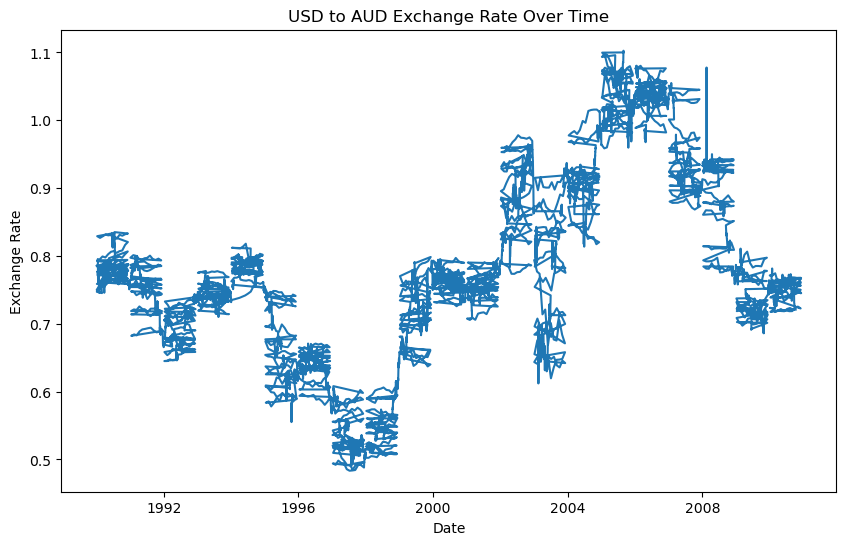

C:\Users\User\AppData\Local\Temp\ipykernel_15856\1142557752.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Ex_rate'] = df['Ex_rate'].fillna(method='ffill')


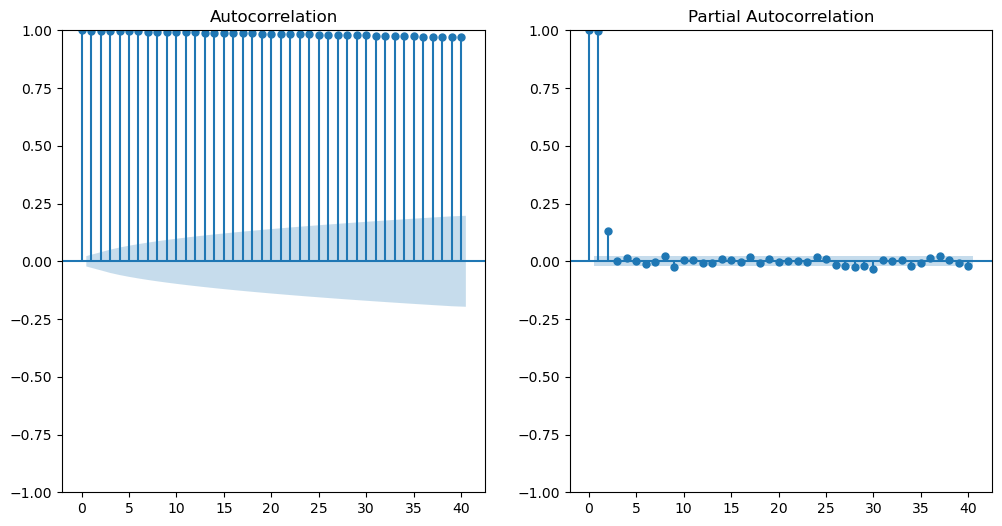

D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 11 Jan 2025   AIC                         -56102.322
Time:                        21:28:26   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

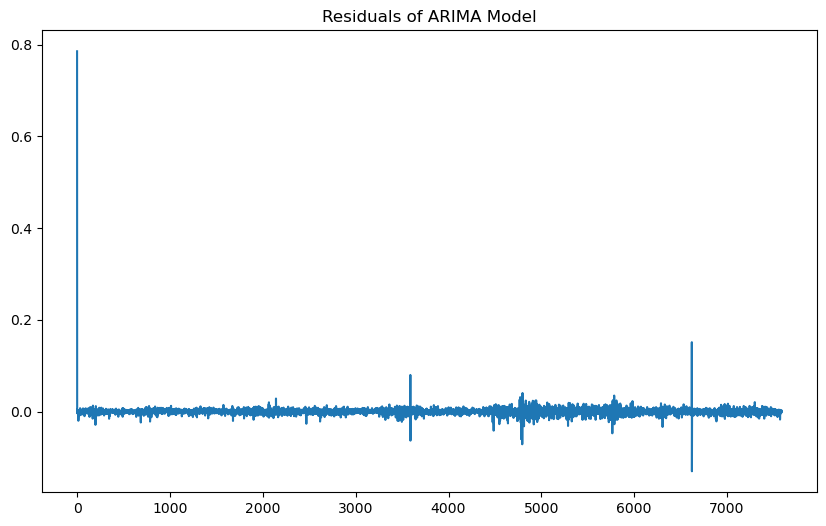

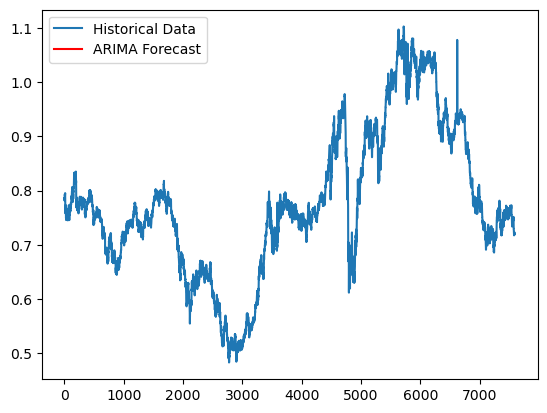

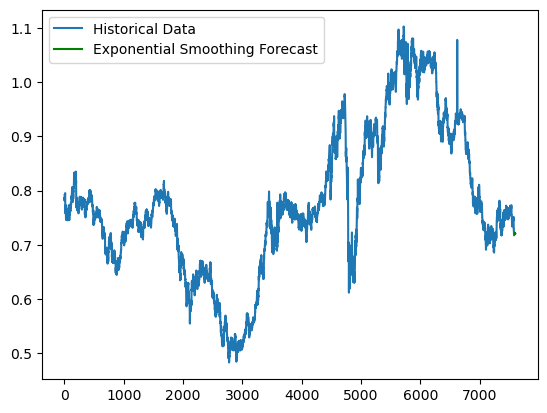

ARIMA MAE: 0.001664492434046964, RMSE: 0.002000358073456273, MAPE: nan
Exponential Smoothing MAE: 0.0015805729140265328, RMSE: 0.0018638058662858658, MAPE: nan
Exponential Smoothing performed better based on MAPE.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Part 1: Data Preparation and Exploration

# Load the dataset and parse the date column
df = pd.read_csv(r'C:\Users\User\Downloads\Timeseries\Timeseries\exchange_rate.csv', parse_dates=['date'], dayfirst=True)

# Check the first few rows of the data
print(df.head())

# Plot the time series to understand trends, seasonality, and anomalies
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['Ex_rate'])
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

# Handle missing values by forward filling
df['Ex_rate'] = df['Ex_rate'].fillna(method='ffill')

# Part 2: Model Building - ARIMA

# Plot ACF and PACF to determine ARIMA parameters (p, d, q)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Ex_rate'], lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Ex_rate'], lags=40, ax=plt.gca())
plt.show()

# Fit the ARIMA model (example: p=1, d=1, q=1)
model_arima = ARIMA(df['Ex_rate'], order=(1,1,1))
model_arima_fit = model_arima.fit()

# Check the ARIMA model summary
print(model_arima_fit.summary())

# Residual analysis for the ARIMA model
residuals = model_arima_fit.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# Out-of-sample forecasting with ARIMA
forecast_arima = model_arima_fit.forecast(steps=12)  # Forecast for the next 12 periods

# Plot actual vs forecasted values for ARIMA
plt.plot(df['Ex_rate'], label='Historical Data')
plt.plot(range(len(df), len(df)+12), forecast_arima, label='ARIMA Forecast', color='red')
plt.legend()
plt.show()

# Part 3: Model Building - Exponential Smoothing

# Fit Holt-Winters model (additive trend and seasonal components)
model_exp = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
model_exp_fit = model_exp.fit()

# Forecast using Exponential Smoothing
forecast_exp = model_exp_fit.forecast(steps=12)

# Plot actual vs forecasted values for Exponential Smoothing
plt.plot(df['Ex_rate'], label='Historical Data')
plt.plot(range(len(df), len(df)+12), forecast_exp, label='Exponential Smoothing Forecast', color='green')
plt.legend()
plt.show()

# Part 4: Evaluation and Comparison

# Actual data (if available, otherwise use the forecasted values for comparison)
# You would typically have actual values here to compare the forecasts with. For now, we assume the forecast is compared to historical data.

# Calculate MAE, RMSE, and MAPE for ARIMA
mae_arima = mean_absolute_error(df['Ex_rate'][-12:], forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(df['Ex_rate'][-12:], forecast_arima))
mape_arima = np.mean(np.abs((df['Ex_rate'][-12:] - forecast_arima) / df['Ex_rate'][-12:])) * 100

# Calculate MAE, RMSE, and MAPE for Exponential Smoothing
mae_exp = mean_absolute_error(df['Ex_rate'][-12:], forecast_exp)
rmse_exp = np.sqrt(mean_squared_error(df['Ex_rate'][-12:], forecast_exp))
mape_exp = np.mean(np.abs((df['Ex_rate'][-12:] - forecast_exp) / df['Ex_rate'][-12:])) * 100

# Print error metrics for both models
print(f"ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}")
print(f"Exponential Smoothing MAE: {mae_exp}, RMSE: {rmse_exp}, MAPE: {mape_exp}")

# Part 5: Model Comparison and Conclusion

# Discuss which model performed better
if mape_arima < mape_exp:
    print("ARIMA performed better based on MAPE.")
else:
    print("Exponential Smoothing performed better based on MAPE.")
